In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e12/sample_submission.csv
/kaggle/input/playground-series-s4e12/train.csv
/kaggle/input/playground-series-s4e12/test.csv


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

# Loading Dataset.

In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e12/train.csv', index_col='id')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e12/test.csv', index_col='id')
if 'Premium Amount' not in test_df.columns:
    test_df['Premium Amount'] = 0
df = pd.concat([train_df, test_df], axis = 0)

In [4]:
train_df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [5]:
test_df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [6]:
df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [7]:
df.head(5)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [8]:
df.tail(5)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,NaN,14.498639,Rural,Premium,NaN,8.0,309.0,2.0,2021-07-09 15:21:39.184157,Average,Yes,Daily,Condo,0.0
1999996,NaN,Female,73462.0,Single,0.0,Master's,NaN,8.145748,Rural,Basic,2.0,0.0,NaN,2.0,2023-03-28 15:21:39.250151,Good,No,Daily,Apartment,0.0
1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,Comprehensive,NaN,10.0,NaN,6.0,2019-09-30 15:21:39.132191,Poor,No,Monthly,Apartment,0.0
1999998,34.0,Female,45661.0,Single,3.0,Master's,NaN,15.937248,Urban,Premium,2.0,17.0,467.0,7.0,2022-05-09 15:21:39.253660,Average,No,Weekly,Condo,0.0
1999999,25.0,Male,24843.0,Divorced,3.0,High School,NaN,24.893939,Suburban,Comprehensive,NaN,15.0,NaN,8.0,2021-05-18 15:21:39.108562,Good,No,Rarely,House,0.0


In [9]:
df['Policy Start Date'] = pd.DatetimeIndex(df['Policy Start Date'])
df['year'] = df['Policy Start Date'].dt.year
df['month'] = df['Policy Start Date'].dt.month
df['date'] = df['Policy Start Date'].dt.day
df['day'] = df['Policy Start Date'].dt.weekday

# Analyzing the dataset.

## Getting insights

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 1999999
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Age                   float64       
 1   Gender                object        
 2   Annual Income         float64       
 3   Marital Status        object        
 4   Number of Dependents  float64       
 5   Education Level       object        
 6   Occupation            object        
 7   Health Score          float64       
 8   Location              object        
 9   Policy Type           object        
 10  Previous Claims       float64       
 11  Vehicle Age           float64       
 12  Credit Score          float64       
 13  Insurance Duration    float64       
 14  Policy Start Date     datetime64[ns]
 15  Customer Feedback     object        
 16  Smoking Status        object        
 17  Exercise Frequency    object        
 18  Property Type         object        
 19  Premi

In this competition our objective is to predict the target variable `Premium Amount` from the given dataset.

In [11]:
df.shape

(2000000, 24)

In [12]:
df.dtypes

Age                            float64
Gender                          object
Annual Income                  float64
Marital Status                  object
Number of Dependents           float64
Education Level                 object
Occupation                      object
Health Score                   float64
Location                        object
Policy Type                     object
Previous Claims                float64
Vehicle Age                    float64
Credit Score                   float64
Insurance Duration             float64
Policy Start Date       datetime64[ns]
Customer Feedback               object
Smoking Status                  object
Exercise Frequency              object
Property Type                   object
Premium Amount                 float64
year                             int32
month                            int32
date                             int32
day                              int32
dtype: object

In [13]:
df.isna().sum()

Age                      31194
Gender                       0
Annual Income            74809
Marital Status           30865
Number of Dependents    182802
Education Level              0
Occupation              597200
Health Score            123525
Location                     0
Policy Type                  0
Previous Claims         606831
Vehicle Age                  9
Credit Score            229333
Insurance Duration           3
Policy Start Date            0
Customer Feedback       130100
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
year                         0
month                        0
date                         0
day                          0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe().style.background_gradient()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Premium Amount,year,month,date,day
count,1968806.000000,1925191.000000,1817198.000000,1876475.000000,1393169.000000,1999991.000000,1770667.000000,1999997.000000,2000000,2000000.000000,2000000.000000,2000000.000000,2000000.000000,2000000.000000
mean,41.141914,32768.681192,2.009695,25.613559,1.003562,9.570690,592.916507,5.018511,2022-02-13 05:36:06.434768640,661.526893,2021.620978,6.491916,15.710499,2.994747
min,18.000000,1.000000,0.000000,1.646561,0.000000,0.000000,300.000000,1.000000,2019-08-17 15:21:39.080371,0.000000,2019.000000,1.000000,1.000000,0.000000
25%,30.000000,8021.000000,1.000000,15.918658,0.000000,5.000000,468.000000,3.000000,2020-11-20 15:21:39.134960128,0.000000,2020.000000,4.000000,8.000000,1.000000
50%,41.000000,23957.000000,2.000000,24.579581,1.000000,10.000000,595.000000,5.000000,2022-02-14 15:21:39.134960128,360.000000,2022.000000,6.000000,16.000000,3.000000
75%,53.000000,44641.000000,3.000000,34.523910,2.000000,15.000000,721.000000,7.000000,2023-05-06 15:21:39.223389952,1037.000000,2023.000000,9.000000,23.000000,5.000000
max,64.000000,149997.000000,4.000000,58.975914,9.000000,19.000000,849.000000,9.000000,2024-08-15 15:21:39.287115,4999.000000,2024.000000,12.000000,31.000000,6.000000
std,13.539099,32188.136083,1.416499,12.204827,0.982826,5.774592,150.035711,2.594102,nan,860.627115,1.476249,3.432206,8.808714,2.002046


In [16]:
df.describe(include='O')

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
count,2000000,1969135,2000000,1402800,2000000,2000000,1869900,2000000,2000000,2000000
unique,2,3,4,3,3,3,3,2,4,3
top,Male,Single,Master's,Employed,Suburban,Premium,Average,Yes,Weekly,House
freq,1003660,659096,506370,471324,668732,669475,629122,1003732,510693,667500


This provides descriptive statistics for categorical (object-type) columns in your DataFrame

## Columnwise analysis.

In [17]:
df.columns

Index(['Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount', 'year', 'month', 'date', 'day'],
      dtype='object')

In [18]:
df['Age'].isna().sum()

31194

In [19]:
print(f"Total Null Values in Gender Column: {df['Gender'].isna().sum()}")
print(f"Total Unique Values in Gender Column: {df['Gender'].unique()}")

Total Null Values in Gender Column: 0
Total Unique Values in Gender Column: ['Female' 'Male']


In [20]:
print(f"Total Null Values in Marital Status Column: {df['Marital Status'].isna().sum()}")
print(f"Total Unique Values in Marital Status Column: {df['Marital Status'].unique()}")

Total Null Values in Marital Status Column: 30865
Total Unique Values in Marital Status Column: ['Married' 'Divorced' 'Single' nan]


In [21]:
print(f"Total Null Values in Education Level Column: {df['Education Level'].isna().sum()}")
print(f"Total Unique Values in Education Level Column: {df['Education Level'].unique()}")

Total Null Values in Education Level Column: 0
Total Unique Values in Education Level Column: ["Bachelor's" "Master's" 'High School' 'PhD']


In [22]:
print(f"Total Null Values in Occupation Column: {df['Occupation'].isna().sum()}")
print(f"Total Unique Values in Occupation Column: {df['Occupation'].unique()}")

Total Null Values in Occupation Column: 597200
Total Unique Values in Occupation Column: ['Self-Employed' nan 'Employed' 'Unemployed']


In [23]:
print(f"Total Null Values in Location Column: {df['Location'].isna().sum()}")
print(f"Total Unique Values in Location Column: {df['Location'].unique()}")

Total Null Values in Location Column: 0
Total Unique Values in Location Column: ['Urban' 'Rural' 'Suburban']


In [24]:
print(f"Total Null Values in Customer Feedback Column: {df['Customer Feedback'].isna().sum()}")
print(f"Total Unique Values in Customer Feedback Column: {df['Customer Feedback'].unique()}")

Total Null Values in Customer Feedback Column: 130100
Total Unique Values in Customer Feedback Column: ['Poor' 'Average' 'Good' nan]


In [25]:
print(f"Total Null Values in Smoking Status Column: {df['Smoking Status'].isna().sum()}")
print(f"Total Unique Values in Smoking Status Column: {df['Smoking Status'].unique()}")

Total Null Values in Smoking Status Column: 0
Total Unique Values in Smoking Status Column: ['No' 'Yes']


In [26]:
print(f"Total Null Values in Customer Feedback Column: {df['Customer Feedback'].isna().sum()}")
print(f"Total Unique Values in Customer Feedback Column: {df['Customer Feedback'].unique()}")

Total Null Values in Customer Feedback Column: 130100
Total Unique Values in Customer Feedback Column: ['Poor' 'Average' 'Good' nan]


In [27]:
print(f"Total Null Values in Exercise Frequency Column: {df['Exercise Frequency'].isna().sum()}")
print(f"Total Unique Values in Exercise Frequency Column: {df['Exercise Frequency'].unique()}")

Total Null Values in Exercise Frequency Column: 0
Total Unique Values in Exercise Frequency Column: ['Weekly' 'Monthly' 'Daily' 'Rarely']


In [28]:
print(f"Total Null Values in Property Type Column: {df['Property Type'].isna().sum()}")
print(f"Total Unique Values in Property Type Column: {df['Property Type'].unique()}")

Total Null Values in Property Type Column: 0
Total Unique Values in Property Type Column: ['House' 'Apartment' 'Condo']


## Checking NULL values

Checking `Null Values`

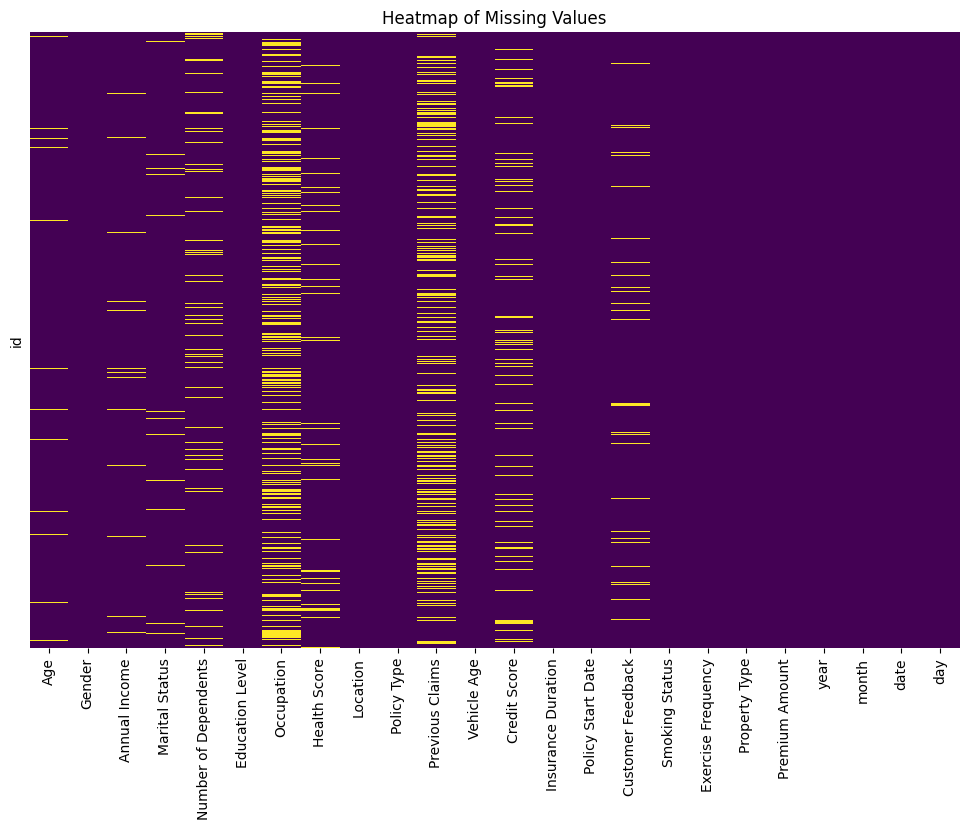

In [29]:
# Create a heatmap to visualize null values
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Heatmap of Missing Values')
plt.show()

The dataset is pretty much clean.

In [30]:
missing = df.isna().sum().reset_index()
missing.columns = ['features','missing_count']
missing['percentage'] = missing['missing_count']/df.shape[0]*100
(missing[missing['missing_count']>0]
 .sort_values(by='missing_count',ascending=False)
 .reset_index(drop=True)
 .style.background_gradient())

,features,missing_count,percentage
0,Previous Claims,606831,30.341550
1,Occupation,597200,29.860000
2,Credit Score,229333,11.466650
3,Number of Dependents,182802,9.140100
4,Customer Feedback,130100,6.505000
5,Health Score,123525,6.176250
6,Annual Income,74809,3.740450
7,Age,31194,1.559700
8,Marital Status,30865,1.543250
9,Vehicle Age,9,0.000450


## Checking Outliers

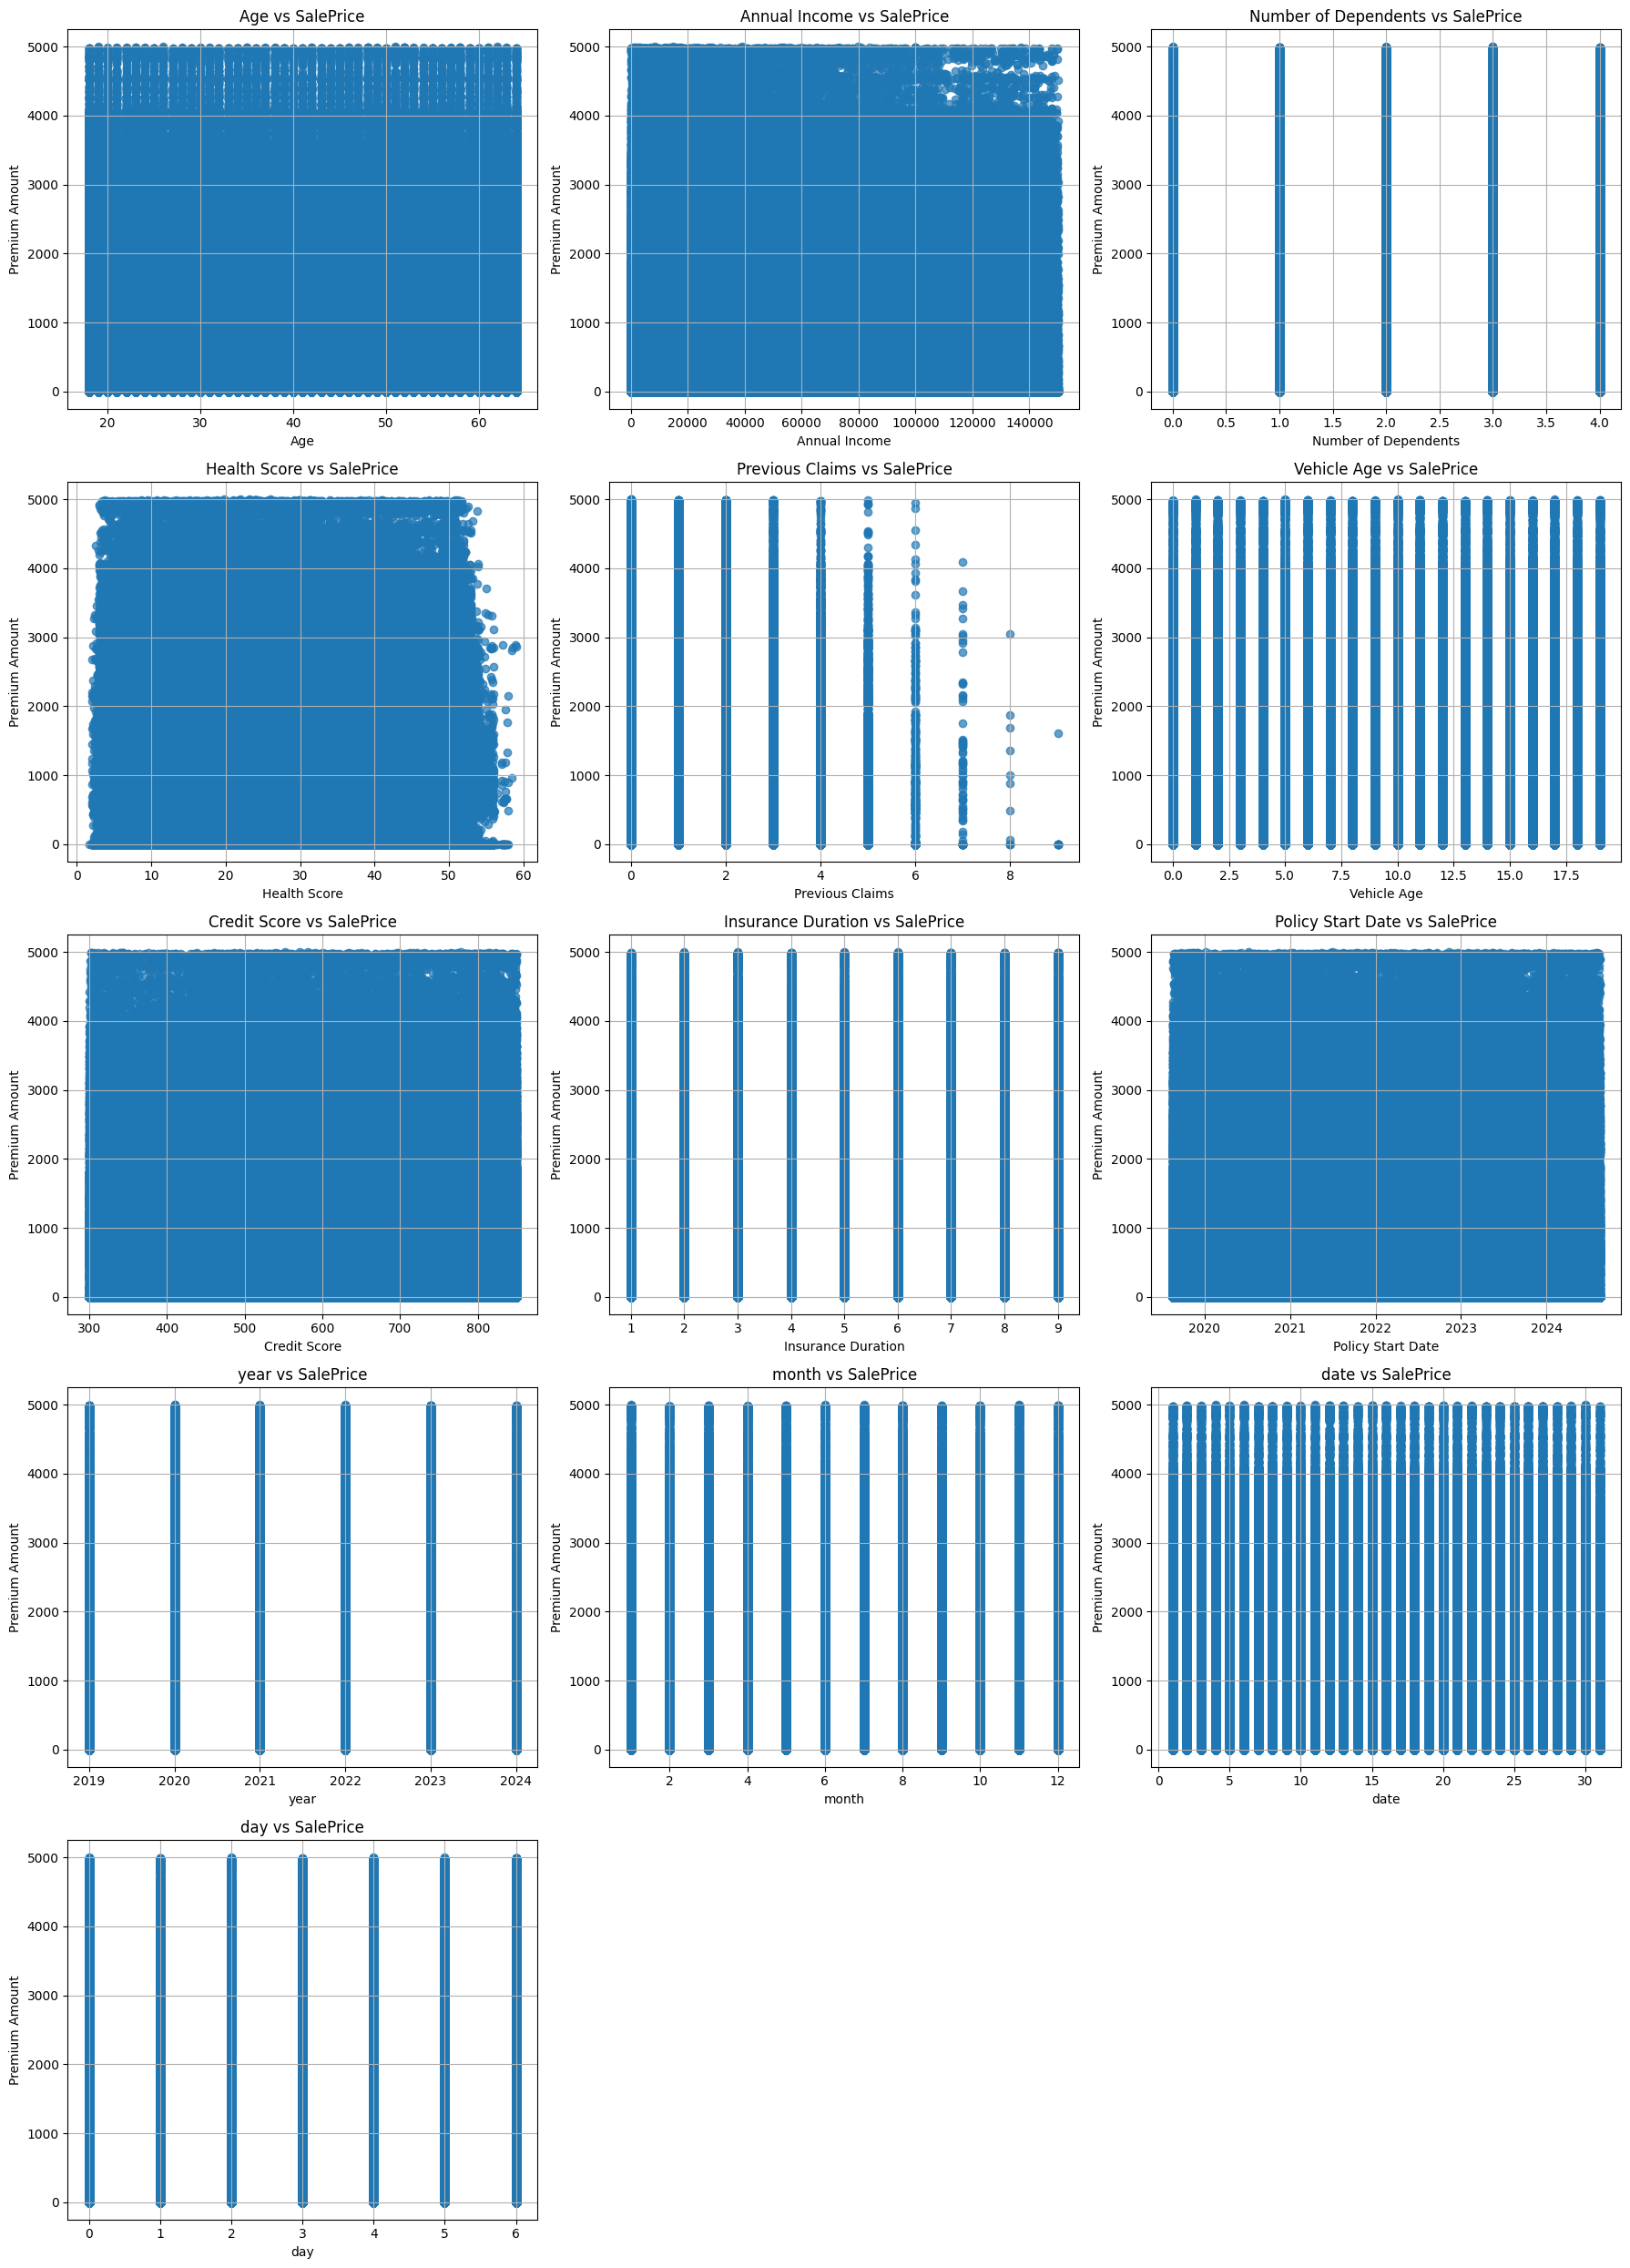

In [31]:
# Extract numerical columns except 'Premium Amount'
df_numerical = df.select_dtypes(exclude=['object'])

# Initialize variables for subplot layout
columns = df_numerical.columns.drop('Premium Amount')  # Exclude 'Premium Amount'
num_plots = len(columns)
rows = (num_plots + 2) // 3  # Calculate number of rows needed (3 plots per row)

# Create subplots
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 5))  # Adjust figure size for better readability
axes = axes.flatten()  # Flatten axes array for easier indexing

# Plot each column
for i, column in enumerate(columns):
    ax = axes[i]
    ax.scatter(df_numerical[column], df_numerical['Premium Amount'], alpha=0.7)
    ax.set_title(f'{column} vs SalePrice')
    ax.set_xlabel(column)
    ax.set_ylabel('Premium Amount')
    ax.grid(True)

# Hide any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Very low amount of outliers.

# Data Preprocessing

## Handling NULL values.

In [32]:
# Identify columns with NULL values
columns_with_null = df.columns[df.isnull().any()].tolist()

# Display the result
print("Columns with NULL values:")
print(columns_with_null)

Columns with NULL values:
['Age', 'Annual Income', 'Marital Status', 'Number of Dependents', 'Occupation', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Customer Feedback']


__Numerical Columns__: `Age`, `Annual Income`, `Health Score`, `Previous Claims`, `Vehicle Age`, `Credit Score`, `Insurance Duration`.

__Categorical Columns__: `Marital Status`, `Number of Dependents`, `Occupation`, `Customer Feedback`

In [33]:
# Mean Imputation:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Annual Income'].fillna(df['Annual Income'].mean(), inplace=True)
df['Health Score'].fillna(df['Health Score'].mean(), inplace=True)

In [34]:
# Median Imputation
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
df['Vehicle Age'].fillna(df['Vehicle Age'].median(), inplace=True)
df['Number of Dependents'].fillna(0, inplace=True)

In [35]:
# Domain Specific Constants.
df['Previous Claims'].fillna(0, inplace=True)

In [36]:
# Categorical Data MODE imputation.
df['Marital Status'].fillna(df['Marital Status'].mode()[0], inplace=True)
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace=True)

In [37]:
# Filling with `Unknown` value.
df['Customer Feedback'].fillna('Unknown', inplace=True)

In [38]:
# May have some logical sequence.
df['Marital Status'].fillna(method='ffill', inplace=True)
df['Occupation'].fillna(method='bfill', inplace=True)

<ipython-input-38-262a3603a2e6>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Marital Status'].fillna(method='ffill', inplace=True)
<ipython-input-38-262a3603a2e6>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Occupation'].fillna(method='bfill', inplace=True)


In [39]:
# If there is no feedback then the customers are most likely satisfied
df['Customer Feedback'].fillna('Good', inplace=True)

In [40]:
df.head(5)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,...,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount,year,month,date,day
id,,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,...,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0,2023,12,23,5
1,39.0,Female,31678.0,Divorced,3.0,Master's,Employed,15.569731,Rural,Comprehensive,...,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0,2023,6,12,0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,...,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0,2023,9,30,5
3,21.0,Male,141855.0,Married,2.0,Bachelor's,Employed,10.938144,Rural,Basic,...,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0,2024,6,12,2
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,...,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0,2021,12,1,2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000000 entries, 0 to 1999999
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Age                   float64       
 1   Gender                object        
 2   Annual Income         float64       
 3   Marital Status        object        
 4   Number of Dependents  float64       
 5   Education Level       object        
 6   Occupation            object        
 7   Health Score          float64       
 8   Location              object        
 9   Policy Type           object        
 10  Previous Claims       float64       
 11  Vehicle Age           float64       
 12  Credit Score          float64       
 13  Insurance Duration    float64       
 14  Policy Start Date     datetime64[ns]
 15  Customer Feedback     object        
 16  Smoking Status        object        
 17  Exercise Frequency    object        
 18  Property Type         object        
 19  Premi

In [42]:
df.drop('Policy Start Date', axis=1, inplace=True)

## Encoding the categorical columns.

In [43]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Print the categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
Index(['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
       'Policy Type', 'Customer Feedback', 'Smoking Status',
       'Exercise Frequency', 'Property Type'],
      dtype='object')


In [44]:
# Use pandas get_dummies for One-Hot Encoding
df = pd.get_dummies(df, columns=['Gender', 'Marital Status', 'Education Level', 
                                 'Occupation', 'Location', 'Policy Type', 
                                 'Smoking Status', 'Property Type', 'Exercise Frequency',
                                 'Customer Feedback'], drop_first=True)

In [45]:
df.head(5)

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,year,...,Policy Type_Premium,Smoking Status_Yes,Property Type_Condo,Property Type_House,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Customer Feedback_Good,Customer Feedback_Poor,Customer Feedback_Unknown
id,,,,,,,,,,,,,,,,,,,,,
0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.0,5.0,2869.0,2023,...,True,False,False,True,False,False,True,False,True,False
1,39.0,31678.0,3.0,15.569731,1.0,12.0,694.0,2.0,1483.0,2023,...,False,True,False,True,True,False,False,False,False,False
2,23.0,25602.0,3.0,47.177549,1.0,14.0,595.0,3.0,567.0,2023,...,True,True,False,True,False,False,True,True,False,False
3,21.0,141855.0,2.0,10.938144,1.0,0.0,367.0,1.0,765.0,2024,...,False,True,False,False,False,False,False,False,True,False
4,21.0,39651.0,1.0,20.376094,0.0,8.0,598.0,4.0,2022.0,2021,...,True,True,False,True,False,False,True,False,True,False


# Preparing Dataset for Training and Testing

In [46]:
training_data = df[0:len(train_df)]
testing_data = df[len(train_df):]
testing_data = testing_data.drop(columns='Premium Amount')

In [47]:
X = training_data.drop(columns='Premium Amount')
y = training_data['Premium Amount']
# Don't get afraid, as the evaluation will be done based on Root Mean Squared Logarithmic Error (RMSLE)
# That's why using this log1p.
y_log1p = np.log1p(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_log1p, test_size = 0.2)
y_train = np.reshape(y_train,(-1, 1))
y_test = np.reshape(y_test,(-1, 1))
X_train.shape, y_train.shape

((960000, 33), (960000, 1))

In [48]:
X['Insurance Duration'].fillna(X['Insurance Duration'].median(), inplace=True)

# Model Initialization.

In [49]:
# Calculate RMSLE
def rmsle(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true,y_pred))

## Model 1: (CatBoostRegressor)

In [50]:
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor 
from sklearn.metrics import mean_squared_log_error

def train_model():
    kf=KFold(n_splits=5,shuffle=True,random_state=42)
    oof=np.zeros(len(X))
    models=[]
    for fold,(train_idx,valid_idx) in enumerate(kf.split(X)):
        print(f"fold{fold+1}")
        x_train,x_valid=X.iloc[train_idx],X.iloc[valid_idx]
        y_train,y_valid=y_log1p.iloc[train_idx],y_log1p.iloc[valid_idx]
        model=CatBoostRegressor(
            iterations=2000,
            learning_rate=0.05,
            depth=6,
            eval_metric="RMSE",
            random_seed=42,
            verbose=200,
            task_type="GPU",
            l2_leaf_reg=0.7
        )
        model.fit(x_train,y_train,eval_set=(x_valid,y_valid),early_stopping_rounds=300,)
        models.append(model)
        oof[valid_idx]=np.maximum(0,model.predict(x_valid))
        fold_rmsle=rmsle(np.expm1(y_valid),np.expm1(oof[valid_idx]))
        print(f'fold{fold+1}RMSLE:{fold_rmsle}')
    return models,oof

In [51]:
models,oof=train_model()

fold1
0:	learn: 1.0930643	test: 1.0938220	best: 1.0938220 (0)	total: 17.9s	remaining: 9h 57m 43s
200:	learn: 1.0498949	test: 1.0512626	best: 1.0512626 (200)	total: 19.3s	remaining: 2m 52s
400:	learn: 1.0482310	test: 1.0503765	best: 1.0503758 (399)	total: 20.7s	remaining: 1m 22s
600:	learn: 1.0471497	test: 1.0501519	best: 1.0501512 (598)	total: 22s	remaining: 51.2s
800:	learn: 1.0461891	test: 1.0500098	best: 1.0500049 (767)	total: 23.5s	remaining: 35.1s
1000:	learn: 1.0452880	test: 1.0499255	best: 1.0499233 (997)	total: 24.8s	remaining: 24.8s
1200:	learn: 1.0444498	test: 1.0499506	best: 1.0499214 (1071)	total: 26.2s	remaining: 17.4s
1400:	learn: 1.0436169	test: 1.0499209	best: 1.0499133 (1341)	total: 27.5s	remaining: 11.8s
1600:	learn: 1.0428102	test: 1.0499450	best: 1.0499022 (1453)	total: 28.9s	remaining: 7.2s
bestTest = 1.049902153
bestIteration = 1453
Shrink model to first 1454 iterations.
fold1RMSLE:1.049902172628687
fold2
0:	learn: 1.0933457	test: 1.0925643	best: 1.0925643 (0)	tot

# Submission

In [52]:
sample=pd.read_csv('/kaggle/input/playground-series-s4e12/sample_submission.csv')

In [53]:
predictions=np.zeros(len(testing_data))
for model in models:
    predictions+=np.maximum(0,np.expm1(model.predict(testing_data)))/len(models)
sample["Premium Amount"]=predictions 
sample.to_csv("output.csv",index=False)